In [1]:
# imports
from merit import run_merit, systematic_sampling
from helpers import swiss_nsf, plot_intervals
import numpy as np

This notebook walks through an example of running the MERIT algorithm to randomly select proposals given a list of quality intervals for each proposal.

## (1) Generate quality intervals for each proposal

* Our method for random selection of proposals starts with *interval estimates* of the quality of each proposal. There are many ways to generate such intervals --- for example, you could use the min and max review score given to each proposal in peer review or use confidence intervals from a model estimated on review scores.

*  In the example in this notebook, we will start by loading existing intervals from the file data/example_intervals.txt. In order to run MERIT on your own data, replace these intervals with your own intervals (which should be a list of tuples.)

In [ ]:
# Read intervals from data/example_intervals.csv
intervals = []
with open('data/example_intervals.txt', 'r') as f:
    for line in f:
        start, end = map(float, line.strip().strip('()').split(','))
        intervals.append((start, end))

In [3]:
# intervals is a list of tuples (lower, upper) representing the intervals
intervals[:5]

[(348.0, 352.0),
 (347.0, 351.0),
 (346.0, 351.0),
 (346.0, 351.0),
 (346.0, 351.0)]

Below, we plot the top 50 proposals based on their point estimates ($x$). Note that higher values correspond to higher "quality" **so stronger candidates are those with higher scores.**

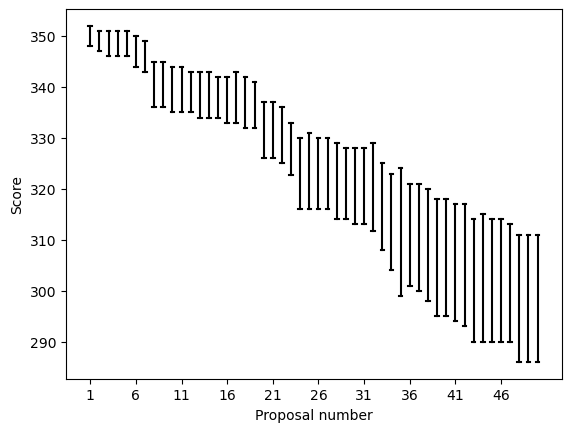

In [4]:
ax = plot_intervals(intervals[:50])

## (2) Run MERIT

We will choose $k=100$ out of $353$ intervals using MERIT. This is simple to do using the `run_merit` function. MERIT takes as input the list of intervals and the number of proposals to select ($k$). It returns the list of probabilities of selecting each proposal and the set of (randomly) selected proposals.

In [5]:
k = 100

In [6]:
selection_probabilities_merit, selected_proposals = run_merit(intervals, k)

## (3) Compare to Swiss NSF selection mechanism

We can also compare the MERIT selection mechanism to selection using the Swiss NSF's approach (which sets a threshold as the k-th highest point estimate.) The Swiss NSF algorithm requires both intervals and point estimates of quality. Here, we will assume that the point estimates are just the midpoint of each interval.

In [7]:
# Point estimates are midpoint of each interval 
points = [(low + high) / 2 for low, high in intervals] 

In [8]:
# Get selection probability of each proposal using Swiss NSF method
selection_probabilities_swiss = swiss_nsf(intervals, points, k)
# Sample proposals using systematic sampling
selected_swiss = systematic_sampling(k, selection_probabilities_swiss)

Below, we compare the selection probabilities under MERIT and the Swiss NSF method. 14 proposals have a higher chance of selection under the Swiss NSF method than MERIT and 7 have a lower change of selection.

In [9]:
diff = np.array(selection_probabilities_swiss) - np.array(selection_probabilities_merit)
len(diff[diff > 0]), len(diff[diff < 0]), (diff[diff != 0])

(14,
 7,
 array([-0.17836257, -0.17836257, -0.17836257, -0.17836257,  0.08479532,
         0.08479532,  0.08479532,  0.08479532,  0.08479532,  0.08479532,
         0.08479532,  0.08479532,  0.08479532,  0.08479532,  0.08479532,
         0.08479532,  0.30584795,  0.30584795, -0.30526316, -0.30526316,
        -0.30526316]))